# Basic usage

Using `pyrosm` is straightforward. Following sections introduce the basics how to parse various kind of datasets from OSM Protobuf files.

**How to?**
 
- [Download PBF data with Pyrosm](#protobuf-file-what-is-it-and-how-to-get-one)
- [Read street networks from OSM](#read-street-networks)
- [Read buildings from OSM](#read-buildings)
- [Read Points of Interest (POI)](#read-points-of-interest)
- [Read landuse from OSM](#read-landuse)
- [Read natural (elements) from OSM](#read-natural)
- [Read boundaries from OSM](#read-boundaries)
- [Read OSM data with custom filter](#read-osm-data-with-custom-filter)
- [Use bounding box to filter data from specific area](#filtering-data-based-on-bounding-box)
- [Use the Pyrosm/OSM tagging system](#pyrosm-osm-tagging-system)
- [How to control which OSM attributes are returned as columns?](#controlling-which-osm-attributes-are-parsed-into-columns)
- [**NEW**: Export street networks to graph](#export-street-networks-to-graph)

## Protobuf file: What is it and how to get one?

`Pyrosm` is designed to work with [Protocolbuffer Binary Format (PBF)](https://wiki.openstreetmap.org/wiki/PBF_Format) -files. This file format is a commonly used and efficient method to serialize and compress structured data which is also used by OpenStreetMap contributors to distribute the OSM data. There are a few free data providers distributing OSM data in PBF format, such as: 

  - [Geofabrik](http://download.geofabrik.de/) provides data for countries and other-regions, and
  - [BBBike](https://download.bbbike.org/osm/bbbike/) provides data for various cities across the world. BBBike also provides a handy [tool](https://extract.bbbike.org/) that makes it possible to define your own region that will be used to extract data in PBF format (up to 512 MB in size).


`Pyrosm` provides a function `get_data()` that can be used to download any PBF dataset available at Geofabrik or BBBike to your local machine without the need to go to the website and do this manually. Currently, PBF data can be downloaded from 654 regions in the world.

- To download data from a specific city such as `"Helsinki"`, you can simply call:

In [1]:
from pyrosm import get_data
# Download data for the city of Helsinki
fp = get_data("Helsinki")
print(fp)

/tmp/pyrosm/Helsinki.osm.pbf


By default, the `get_data()` function downloads the PBF file into a local TEMP directory and returns a filepath to the location where the data was downloaded.

It is also possible to define your own `directory` where the data will be downloaded if you don't want to store it in TEMP. 

In [2]:
# Download the data into specified directory
fp = get_data("helsinki", directory="my_data")
print("Data was downloaded to:", fp)

Data was downloaded to: /home/chrisfin/Dokumente/Tools/pyrosm/docs/my_data/Helsinki.osm.pbf


If you have downloaded the data previously into your computer, pyrosm will by default use that same data file. However, if you want to update the data, it is possible to specify `update=True` which will remove the old PBF file and download a fresh version from Geofabrik or BBBike.   

In [3]:
# Refresh the data
# ----------------

# The first call won't download the data because it was already downloaded earlier
fp = get_data("Helsinki")
print(fp)

# This one will update the data and download the data
print("\nDownload will happen:")
fp = get_data("Helsinki", update=True)
print(fp)

/tmp/pyrosm/Helsinki.osm.pbf

Download will happen:
Downloaded Protobuf data 'Helsinki.osm.pbf' (30.5 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'
/tmp/pyrosm/Helsinki.osm.pbf


```{admonition} "UserWarning: The Shapely GEOS ..." ?

Following warning (or something similar) might appear, but is nothing to be worried about (will get fixed eventually): `UserWarning:` *The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.*
```

### Available datasets

You can investigate the available datasets easily by calling:

In [4]:
from pyrosm.data import sources

# Print available source categories
sources.available.keys()

dict_keys(['africa', 'antarctica', 'asia', 'australia_oceania', 'central_america', 'europe', 'north_america', 'south_america', 'cities', 'subregions'])

The available datasets (654) have been divided into categories which makes it easier to navigate through the available PBF files. 

The datasets are divided under **continents**, **cities** and **subregions** (countries with data divided into smaller subregions). 

- As an example, you can see all available data sources in `Africa` by calling:

In [5]:
# Prints a list of countries in Africa that can be downloaded
print(sources.africa.available)

['algeria', 'angola', 'benin', 'botswana', 'burkina_faso', 'burundi', 'cameroon', 'canary_islands', 'cape_verde', 'central_african_republic', 'chad', 'comores', 'congo_brazzaville', 'congo_democratic_republic', 'djibouti', 'egypt', 'equatorial_guinea', 'eritrea', 'ethiopia', 'gabon', 'ghana', 'guinea', 'guinea_bissau', 'ivory_coast', 'kenya', 'lesotho', 'liberia', 'libya', 'madagascar', 'malawi', 'mali', 'mauritania', 'mauritius', 'morocco', 'mozambique', 'namibia', 'niger', 'nigeria', 'rwanda', 'saint_helena_ascension_and_tristan_da_cunha', 'sao_tome_and_principe', 'senegal_and_gambia', 'seychelles', 'sierra_leone', 'somalia', 'south_africa', 'south_africa_and_lesotho', 'south_sudan', 'sudan', 'swaziland', 'tanzania', 'togo', 'tunisia', 'uganda', 'zambia', 'zimbabwe']


- If you want to see all available cities that can be downloaded, call:

In [6]:
# Prints a list of all cities that can be downloaded
print(sources.cities.available)

['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', 'Gent', '

- Some of the countries have smaller sub-regions that can be downloaded separately (such as states in USA):

In [7]:
# Check all countries having sub-regions
print("All countries with sub-regions:", sources.subregions.available.keys())

# Check sub-regions in Brazil
print("Sub-regions in Brazil:", sources.subregions.brazil.available)

All countries with sub-regions: dict_keys(['brazil', 'canada', 'france', 'germany', 'great_britain', 'italy', 'japan', 'netherlands', 'poland', 'russia', 'usa'])
Sub-regions in Brazil: ['centro_oeste', 'nordeste', 'norte', 'sudeste', 'sul']


In a similar manner, you can easily investigate all other regions that are available for download.

When you want to download data for any of these areas, you just need to pass the name of the area into the `get_data()` -function:

In [8]:
# Download data for Aachen
fp = get_data("Aachen")
print(fp)

/tmp/pyrosm/Aachen.osm.pbf


:::{note}   
Some of the available names e.g. in cities are written in `CamelCase` format and some of the countries are written with underscore (e.g. `canary_islands`). Pyrosm tries to automatically identify different styles of writing the place name.
For example, writing `"Rio de Janeiro"` works fine even though the name in `cities.available` list is written as `"RiodeJaneiro"`:

```{code-block} python
# Passing names in slightly different style does not matter
fp = get_data("Rio de Janeiro")
print(fp)
```
```{code-block}
/tmp/pyrosm/RiodeJaneiro.osm.pbf
```
:::

### What to do if you cannot find the data for your area of interest?

In case, you cannot find a region for your needs from the above data sources, it is possible to download data from your own area of interest by using [BBBike's extract tool](https://extract.bbbike.org/), which allows you to parse OSM data from anywhere in the world and download it in **Protocolbuffer Binary** format. 

**Steps:**

 1. Go to [Extract tool](https://extract.bbbike.org/)
 2. Specify the format as **Protocolbuffer (PBF)** from the panel on the left
 3. Specify the name for your data file
 4. Provide the email addresss where a download link for the data file will be sent in a few minutes
 5. When the email arrives, download the data and use that with `pyrosm` as shown in the basic tutorial.
 

## Initializing the Pyrosm OSM -reader object

When using `Pyrosm`, the first step is to initialize a specific reader object called `OSM` that is available from the `pyrosm` library: 

In [9]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.



As we can see from the documentation, the `OSM` object accepts two parameters:
  1. `filepath` which is the filepath to the PBF file (*.osm.pbf) which will be read (see info above how to get one), and
  2. `bounding_box` which is an optional parameter that can be used to filter OSM data geographically from specific area (see [here](#Filtering-data-based-on-bounding-box) for further details) 
  
The following shows how to initialize an `OSM` reader object using a test dataset that comes with Pyrosm, and which can be retrieved using a `get_data` function:

In [10]:
import pyrosm

# Get filepath to test PBF dataset
fp = pyrosm.get_data("test_pbf")
print("Filepath to test data:", fp)

# Initialize the OSM object 
osm = pyrosm.OSM(fp)

# See the type
print("Type of 'osm' instance: ", type(osm))

Filepath to test data: /home/chrisfin/.local/lib/python3.9/site-packages/pyrosm/data/test.osm.pbf
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


As we can see, the test dataset lives in my case somewhere under the miniconda3 package, 
and the type of the `osm` instance is something called `pyrosm.pyrosm.OSM`. 

Notice that `osm` (lower case) is the actually initialized **reader instance** for the given PBF dataset that should always be used to make the calls for fetching different datasets from the OpenStreetMap PBF -file. Read further to see how things work.

## Read street networks

Pyrosm makes it easy to filter street networks using the `get_network()` method. 
You can parse streets separately for different travel modes by specifying the 
type of network using `network_type` -parameter.
The allowed network types are:

 - `walking` (default)
 - `cycling`
 - `driving`
 - `driving+service` (includes also [public service vehicles](https://wiki.openstreetmap.org/wiki/Key:psv))
 
The following shows how to read all drivable roads from OSM. Notice that from here on, we will import the `OSM` reader object directly from the package:

<AxesSubplot:>

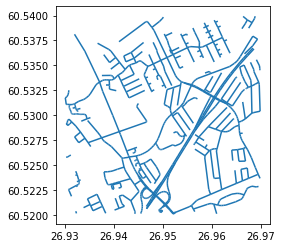

In [11]:
from pyrosm import OSM
from pyrosm import get_data

# Pyrosm comes with a couple of test datasets 
# that can be used straight away without
# downloading anything
fp = get_data("test_pbf")

# Initialize the OSM parser object
osm = OSM(fp)

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

The network contains various information that is parsed from the OSM data, and includes `length` column that contains information about the length of the road in meters (scroll right):

In [12]:
drive_net.head(2)

,access,bridge,highway,int_ref,lanes,lit,maxspeed,name,oneway,ref,service,surface,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"MULTILINESTRING ((26.94310 60.52580, 26.94295 ...",1504.0
1,None,None,secondary,None,None,None,None,None,yes,170,None,None,5184588,1378828296,7,None,way,"MULTILINESTRING ((26.94778 60.52231, 26.94717 ...",242.0


Notice that each `way` in the network is represented as a MultiLineString geometry constructed from multiple road segments. This is how the data is represented by default in OSM. However, this differs if reading [nodes and edges](#read-nodes-and-edges-first-step): in that case each road segment is represented as a separate row in data (to improve connectivity). 

```{hint}

It is also possible to export network to routable graphs in various formats using `to_graph()` function (new in version 0.6.0). Read more from ["Export street networks to graph -section"](#export-street-networks-to-graph).

```

```{admonition} Understanding the "osm_type" -column values

pyrosm will create a column `osm_type` to the result which can contain values `node`, `way` or `relation`. These correspond to the three basic components of OpenStreetMap's conceptual data model of the physical world:

- nodes (points in space),
- ways (linear features and area boundaries), 
- relations (sometimes used to explain how other elements work together).

Hence, the "way" values in `osm_type` column **might not necessarily represent only** `LineString` **features**, as they can also be Polygons or LinearRings. 
If you want to know the geometry types of your data, you can access such information with geopandas by calling (gdf here represents a GeoDataFrame):
 `gdf["geometry_types"] = gdf.geom_type`   
 
Check [an example here](https://github.com/HTenkanen/pyrosm/issues/67#issuecomment-720482051) to see how to filter your GeoDataFrame based on specific geometry type.

```

## Read buildings



<AxesSubplot:>

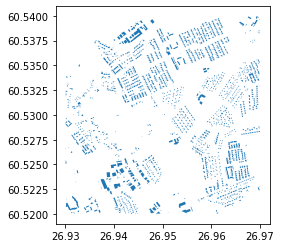

In [13]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
buildings = osm.get_buildings()
buildings.plot()

## Read Points of Interest

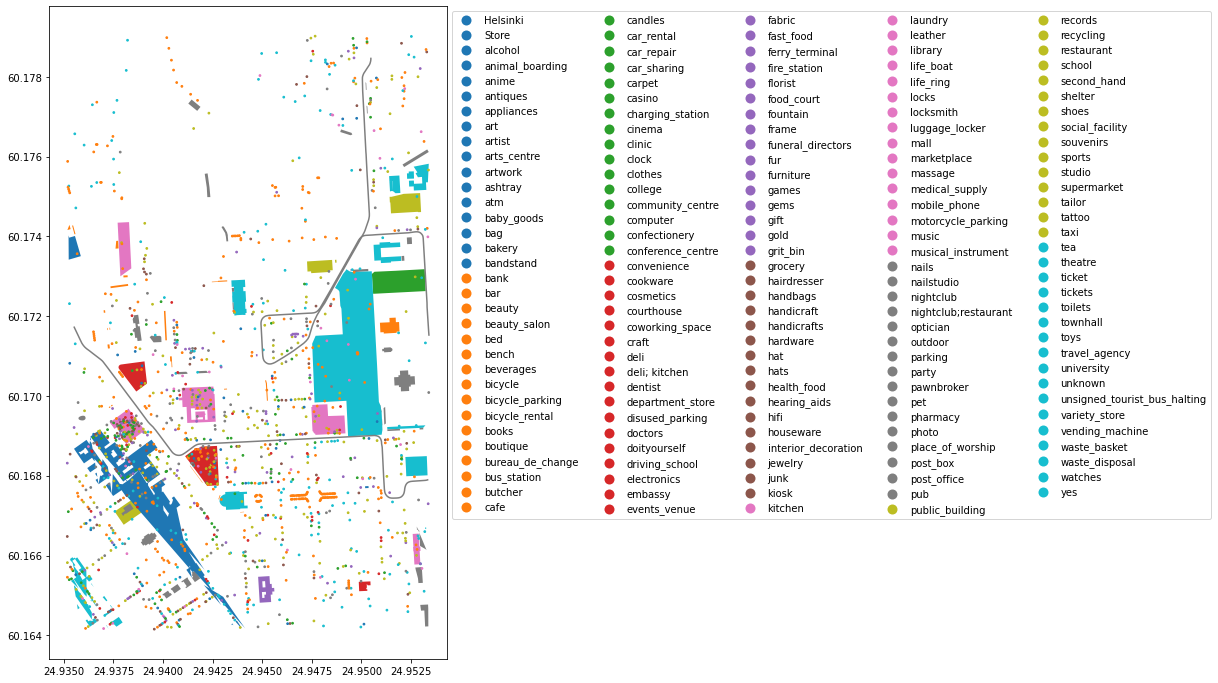

In [14]:
# Read POIs such as amenities and shops
# =====================================
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)

# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

## Read landuse

<AxesSubplot:>

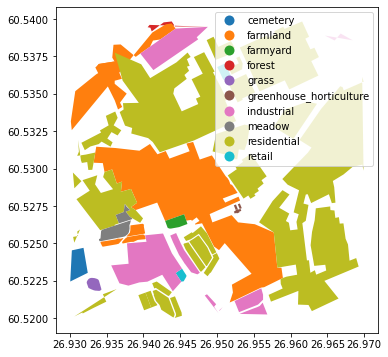

In [15]:
# Read landuse
# ============
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
landuse = osm.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

## Read natural

<AxesSubplot:>

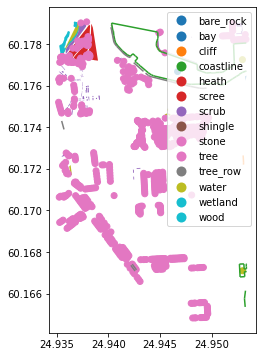

In [16]:
# Read natural
# ============
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))

## Read boundaries

`Pyrosm` supports reading boundaries such as administrative borders from PBF using `get_boundaries()` -function. 
By default, the function reads all `"administrative"` borders from the PBF. You can adjust the type of boundary that is parsed from PBF by modifying `boundary_type` -parameter. You can also search boundaries for specific name using `name` parameter:

<AxesSubplot:>

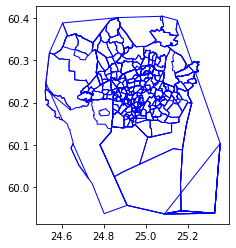

In [17]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("helsinki_region_pbf")
osm = OSM(fp)

# Read all boundaries using the default settings
boundaries = osm.get_boundaries()
boundaries.plot(facecolor="none", edgecolor="blue")

The following shows how to search a specific boundary using the `name` -parameter.    

<AxesSubplot:>

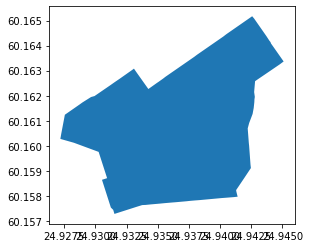

In [18]:
# Note: the following uses the same osm instance initialized above
selected_boundary = osm.get_boundaries(name="Punavuori")
selected_boundary.plot()

The name search functionality supports partial text search, meaning that e.g. a query `"vuori"` would return all elements where the work `"vuori"` is included in the name tag (such as "Punavuori"):

<AxesSubplot:>

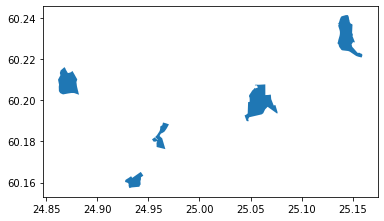

In [19]:
# Use a partial name "vuori" to look for data
selected_boundary = osm.get_boundaries(name="vuori")
selected_boundary.plot()

As we can see there were multiple boundaries in the data that included the word `"vuori"` in their name:

In [20]:
# Check all records that have the word "vuori" in their name
selected_boundary['name'].unique()

array(['Punavuori', 'Munkkivuori', 'Roihuvuori', 'Mustavuori',
       'Vilhonvuori'], dtype=object)

It is also possible to search different kind of boundaries from the PBF.

Supported boundary types are:

   - `"administrative` (default)
   - `"national_park"`
   - `"political"`
   - `"postal_code"`
   - `"protected_area"`
   - `"aboriginal_lands"`
   - `"maritime"`
   - `"lot"`
   - `"parcel"`
   - `"tract"`
   - `"marker"`
   - `"all"`
    
Let's read all `"protected_area"` boundaries from the PBF:

<AxesSubplot:>

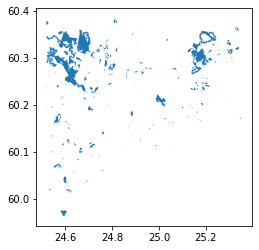

In [21]:
# Note: the following uses the same osm instance initialized above 
protected_areas = osm.get_boundaries(boundary_type="protected_area")
protected_areas.plot()

## Read OSM data with custom filter

Pyrosm also allows making custom queries. For example, to parse all transit related OSM elements you can use following approach 
and create a custom filter combining multiple criteria:

<AxesSubplot:>

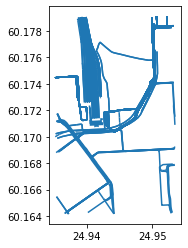

In [22]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("helsinki_pbf")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

# Test reading all transit related data (bus, trains, trams, metro etc.)
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)
transit.plot()

Further information on how to make customized queries is available in [Parsing OSM data with custom queries](custom_filter.ipynb).

## Filtering data based on bounding box

Quite often one might be needing to extract only a subset of the whole OSM PBF file covering e.g. a specific region. `Pyrosm` provides an easy way to filter even larger PBF files using a bounding box (rectangular shape) or a more complex geometric feature (e.g. a Polygon). In the following, we will go through the process of extracting a small sample from the whole PBF dataset for specific area of interest. We will use a data dump from Greater London region and extract data covering the Borough of Camden.

In [23]:
from pyrosm import OSM, get_data

# Download a dataset for Greater London (update if exists in the temp already)
fp = get_data("Greater London", update=True)
osm = OSM(fp)

Downloaded Protobuf data 'greater-london-latest.osm.pbf' (72.78 MB) to:
'/tmp/pyrosm/greater-london-latest.osm.pbf'


In [24]:
# Read buildings (takes ~30 seconds)
buildings = osm.get_buildings()
buildings.head(2)

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,None,Laurence House,...,None,None,None,2956186,1469657765,2,None,way,"POLYGON ((-0.02162 51.44472, -0.02033 51.44469...",NaN
1,None,None,None,None,Town Hall,SE6 4RU,None,Catford Broadway,None,Lewisham Town Hall,...,None,None,None,2956187,1618421397,7,"{""wikidata"":""Q96387354""}",way,"POLYGON ((-0.02108 51.44524, -0.02122 51.44516...",NaN


<AxesSubplot:>

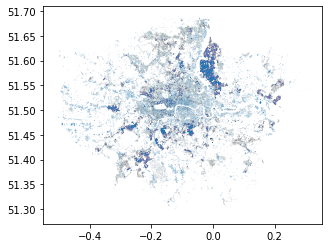

In [25]:
# Plot the buildings (will take awhile to plot)
buildings.plot()

Now have parsed quite a few buildings from the Greater London area (~488,000). 

Let's filter the data spatially and include only buildings from the Borough of Camden. There are a couple of ways how you can pass the bounding box information to the Pyrosm:

 1. You can specify the bounding box by **a list of x- and y-coordinates** (in decimal degrees) of the lower left corner and upper right corner of the geographical area (rectangular) that you want to keep as a result: **[minx, miny, maxx, maxy]** 
 2. You can also specify the bounding by passing a **Shapely Polygon, MultiPolygon or LinearRing** (all closed geometries supported) that can be used to filter the data with a more complex geographical features.
 
We will now use the boundary of the Camden Borough as our spatial filter. For finding the boundaries of Camden Borough is easy by utilizing the `get_boundaries()` -function and using the `name` parameter:

<AxesSubplot:>

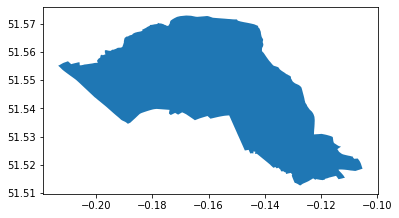

In [26]:
# Get the borough of Camden as our bounding box
bounding_box = osm.get_boundaries(name="London Borough of Camden")
bounding_box.plot()

Now we can initialize the `OSM` reader with the given bounding box that will then keep the data only from the areas that are **within** the given bounding box:

In [27]:
# Get the shapely geometry from GeoDataFrame
bbox_geom = bounding_box['geometry'].values[0]

# Initiliaze with bounding box
osm = OSM(fp, bounding_box=bbox_geom)

Now the bounding box information is stored in the attribute `bounding_box` that will be applied **every time** when an extract of the PBF (e.g. buildings, roads, etc.) is parsed:

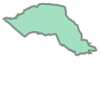

In [28]:
# Bounding box is now stored as an attribute 
osm.bounding_box

**Finally**, let's read the buildings now from the Camden Borough using our bounding box filter. Notice, that you do not need to make any changes to the actual `get_buildings()` call, as the bounding box information is read automatically from the osm instance (`osm.bounding_box`).

In [29]:
# Retrieve buildings for Camden
camden = osm.get_buildings()

Okay, now we have data for the Camden area! Let's take a look what it looks like on a map. 
Here, we will color the building based on how it has been tagged in the OSM:

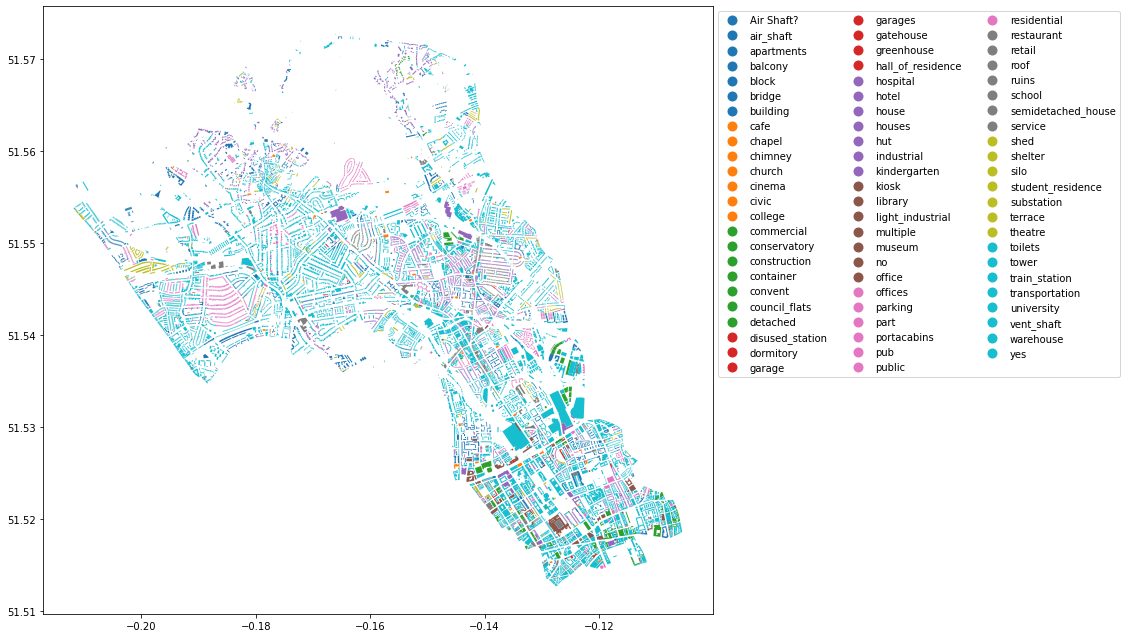

In [30]:
# Let's plot the buildings and specify colors according the type of the building
ax = camden.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))

Great, now we can see that a subset of the data was taken according our bounding box coordinates.

We can utilize the same bounding box for filtering other datasets as well, which can be handy. Let's also filter the walkable roads from the same area:

<AxesSubplot:>

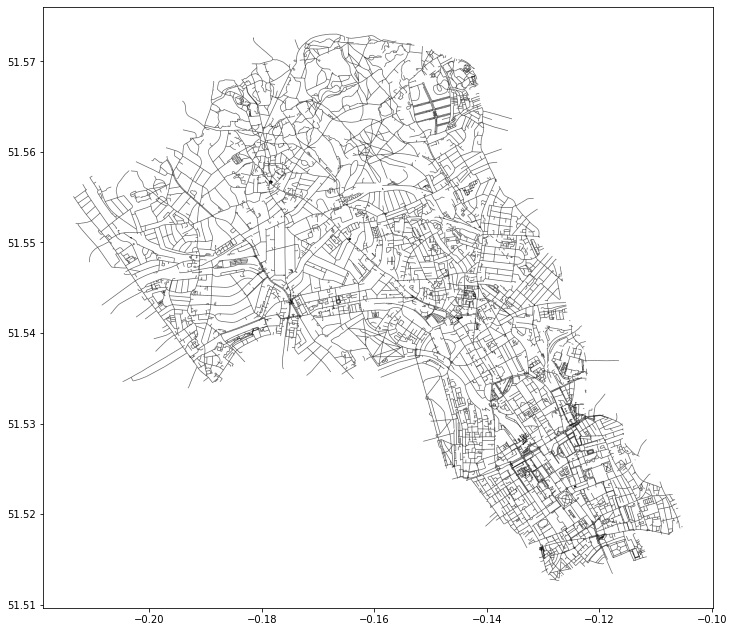

In [31]:
# Apply the same bounding box filter and retrieve walking network
walk = osm.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)

## Pyrosm/OSM tagging system



OpenStreetMap uses a "free tagging system" that allows the map to include an unlimited number of attributes describing each feature. A tag consists of two items, a key and a value. Tags describe specific features of map elements (nodes, ways, or relations) or changesets. Both items are free format text fields, but can often represent also numeric or other structured items (e.g. `maxspeed` attribute contains speed limit information at a given road represented in numbers) ([OSM Wiki, 2020](https://wiki.openstreetmap.org/wiki/Map_Features)).

Because of this flexibility, OSM data tend to contain huge number of different attributes. Because keeping all of these attributes in their own columns is not very practical (the dataframe can end up having even hundreds of columns), `Pyrosm` implements its own tagging system where only specific tags are kept as columns (separately for each OSM key). All the rest of the attributes are stored into a separete column `"tags"` which is a valid JSON object.  

It is possible to see these default tags from the `osm` instance directly by accessing its configuration settings. Let's see how:  

In [32]:
from pyrosm import OSM, get_data

# Initialize the OSM reader with test data
fp = get_data("test_pbf")
osm = OSM(fp)

# The instance has a configuration attribute containing:
print([item for item in osm.conf.__dict__.keys() if not item.startswith("_")])

['network_filters', 'tags', 'oneway_values']


Okay, from here we can see that the configuration includes `network_filter` attribute and `tags` attribute:

 - `network_filter` attribute contains information about the rules that are applied when parsing different kind of roads from the OSM
 - `tags` attribute contains information about the tags that are parsed into columns by default  

Let's take a closer look into the `tags`:

In [33]:
# Show all available tag attributes
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

This is a list basically containing all OSM **primary features** that can be parsed from the OSM (see [wiki for details](https://wiki.openstreetmap.org/wiki/Map_Features#Primary_features)).
Each of these items contain a list of default tags (OSM keys) that will be inserted into columns when parsing the OSM data with Pyrosm. 

For example the default tags that will be turned into columns from **buildings** can be accessed by:

In [34]:
# Show all tags that are converted into columns from building features
osm.conf.tags.building

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'building',
 'amenity',
 'building:flats',
 'building:levels',
 'building:material',
 'building:max_level',
 'building:min_level',
 'building:fireproof',
 'building:use',
 'craft',
 'height',
 'internet_access',
 'landuse',
 'levels',
 'office',
 'operator',
 'shop',
 'source',
 'start_date',
 'wikipedia',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'changeset',
 'version',
 'geometry',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'changeset',
 'version',
 'geometry']

As we can see, there are quite a few attributes that will be parsed into columns **if they exist in the data**. The list is mostly based on the OSM documentation about [Key:building](https://wiki.openstreetmap.org/wiki/Key:building) but it also contains some generic attributes that are commonly useful for many types of OSM features such as name, address information, opening_hours, website etc. Similar approach is used with all OSM Keys listed above in `conf.tags.available`. If the data contains additional attributes not listed in the default tags, such attributes are stored separately into a column `"tags"`. 

Let's make an example to understand this better:

In [35]:
# Parse buildings
buildings = osm.get_buildings()

# Print columns
buildings.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'tags', 'osm_type'],
      dtype='object')

Our test data contains quite many of the default tags as columns (not all though). We seem to have also some additional data in the "tags" columns which were not listed in the *default tag list*.

- Let's take a closer look at those:

In [36]:
# List "extra" tags that were associated with some of the buildings
buildings["tags"].unique()

array([None, '{"mml:class":"42211"}', '{"mml:class":"42221"}',
       '{"mml:class":"42261"}', '{"mml:class":"42241"}',
       '{"mml:class":"42212"}'], dtype=object)

As we can see, some of the OSM elements included information about `"mml:class"` which is additional data that might be relevant for some, but most probably not for most, hence it is not added as a column to the GeoDataFrame. 

It is still possible to access the data values of these "extra tags" by parsing the data from the JSON e.g. as follows:  

In [37]:
import json 

# Iterate over rows having extra tags and print out the values
rows_with_extra_info = buildings.dropna(subset=["tags"])


i = 0
for row in rows_with_extra_info.itertuples():
    
    # Read the JSON
    tags = json.loads(row.tags)
    
    # Print the keys and values
    for key, value in tags.items():
        print("Key:", key, ", value: ", value)
    
    # Continue only up to first 10 
    if i == 9:
        break
    i+=1

Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42221
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211


### Controlling which OSM attributes are parsed into columns 

In some cases, it might be useful to parse some of these "extra" attributes directly into columns. Doing this is easy with `pyrosm` which is demonstrated below.  

In [38]:
from pyrosm import OSM, get_data
# Get test data 
fp = get_data("test_pbf")

# Initialize the reader
osm = OSM(fp)
            
buildings = osm.get_buildings()

# Print info
print("Existing columns:\n", buildings.columns)
print("\nAdditional attributes in the 'tags': \n", buildings.tags.unique())

Existing columns:
 Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'tags', 'osm_type'],
      dtype='object')

Additional attributes in the 'tags': 
 [None '{"mml:class":"42211"}' '{"mml:class":"42221"}'
 '{"mml:class":"42261"}' '{"mml:class":"42241"}' '{"mml:class":"42212"}']


The `"tags"` column includes additional information with key `"mml:class"`. If we would like to parse this attribute also as a column in our resulting GeoDataFrame, we can easily do this by using `extra_attributes` -parameter which accepts a list of keys (one or multiple) that will be converted into columns: 

In [39]:
# Parse buildings and store also "mml:class" as a column
buildings2 = osm.get_buildings(extra_attributes=["mml:class"])

# Print columns
buildings2.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'mml:class', 'osm_type'],
      dtype='object')

Great! Now the `"mml:class"` was also added as column in our GeoDataFrame:

In [40]:
buildings2.tail(5)

,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,name,opening_hours,phone,building,building:levels,landuse,shop,source,id,timestamp,version,geometry,mml:class,osm_type
2188,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115702,1465573852,1,"POLYGON ((26.96337 60.52196, 26.96330 60.52205...",42211,way
2189,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115707,1465573852,1,"POLYGON ((26.96773 60.53151, 26.96771 60.53167...",42211,way
2190,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115720,1465573853,1,"POLYGON ((26.95398 60.52896, 26.95416 60.52883...",42211,way
2191,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115722,1465573853,1,"POLYGON ((26.96623 60.53462, 26.96615 60.53469...",42211,way
2192,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115743,1465573855,1,"POLYGON ((26.93940 60.52654, 26.93940 60.52662...",42211,way


Now it is easy to access and use the values of the new column in a similar manner as any other column:

In [41]:
# Get unique values in the "mml:class" column
print(buildings2["mml:class"].unique())

[None '42211' '42221' '42261' '42241' '42212']


## Export street networks to graph

If you want to analyze the street networks using your favourite network analysis library, you can export the street network from Pyrosm into a graph (new in version 0.6.0). Supported graphs are `iGraph`, `NetworkX` (compatible with `OSMnx`) and `Pandana`. Those libraries provide numerous possibilities to analyze different properties of the graph (e.g. centrality) or conduct e.g. shortest path analysis to find the fastest (or shortest) route from a location to another. Notice that the numerous algorithms provided by these libraries are **not** going to be integrated into Pyrosm, but you can easily export the graphs to these libraries and continue working with them.

Exporting the network into a graph can be done as follows:

 1. Retrieve the graph elements (nodes and edges) from a given OSM network by specifying `nodes=True` in the `osm.get_network()` function.
 2. Use `pyrosm.OSM.graph_from_nodes_and_edges()` static method to convert the nodes and edges into a graph. 
    - The output graph type can be specified with `graph_type` parameter. Available types are: `"igraph"` (default), `"networkx"` and `"pandana"`.

```{hint}If you do not use the graph elements (nodes, edges) elsewhere in your project, you can use the shorthand function `osm.to_graph()`. It does not require nodes and edges as an input. Instead, the nodes and edges of the current network are used.
```
    
Following sections show how to do this in practice.

```{admonition} What is a graph? (a super short intro)
:class: toggle

Graphs are, in principle, quite simple data structures consisting of:

 - nodes (e.g. intersections on a street, or a person in social network), and
 - edges (a link that connects the nodes to each other)

A simple graph could look like this:

![Simple graph with five nodes and edges between them.](img/graph_elements.png)
*Simple graph with five nodes and edges between them.*

Graph can be directed or undirected, which basically determines whether the roads can be travelled to any direction or whether the travel direction is restricted to certain direction (e.g. a one-way-street).
A directed graph looks something like this:

![Directed graph](img/directed_graph.png)
*Directed graph.*
```

### Notes about Pyrosm graph building

- **Pyrosm will always create a directed graph** when exporting the street network to graph (works similarly for all libraries). 
    - When exporting network that is used for driving (i.e. `network_type="driving"`), pyrosm considers the oneway restrictions that are defined in `oneway` column in the data. 
    - With "walking", "cycling" and "all", pyrosm creates a bidirectional graph, meaning that the travel is allowed to both directions. 
- By default, **Pyrosm will only keep connected edges** in the output graph (*largest strongly connected component*). This means that all "isolated islands" of the network will be filtered out because those cannot be reached from other parts of the network (you can change this behavior by specifying `retain_all=True`, see [further info](#to-graph-parameters-explained)).
- When constructing the graph all road segments are kept separately to enable good connectivity in the graph. However, it is possible to *simplify* the NetworkX graph (hence reducing it's size) using OSMnx by merging all road segments belonging to the same link (*i.e. road between two intersections*). Read more from [OSMnx docs here](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/04-simplify-graph-consolidate-nodes.ipynb). (*this might be integrated into Pyrosm in the future iterations of the library*)

### Read nodes and edges (first step)

The first step that needs to be done is to read the nodes and edges from the graph:

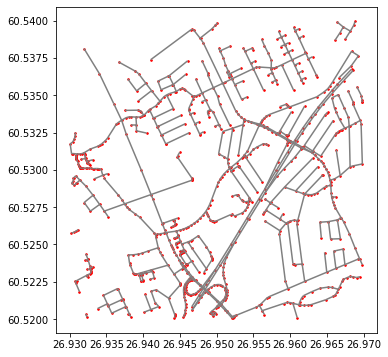

In [42]:
from pyrosm import OSM, get_data

# Initialize reader 
osm = OSM(get_data("test_pbf"))

# Read nodes and edges of the 'driving' network
nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Plot nodes and edges on a map
ax = edges.plot(figsize=(6,6), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)

The map shows the nodes (red color) and edges (gray color) which connect the nodes to each other (thus constructing the network). 

When parsing the nodes, two extra columns (`u` and `v`) are added to the GeoDataFrame. These columns specify the *source* (`u`) and *target* (`u`) nodes for each edge (also commonly called as from- and to-ids): 

In [43]:
# Show the last 5 columns of the first 5 rows in edges 
edges.iloc[:5, -5:]

,osm_type,geometry,u,v,length
0,way,"LINESTRING (26.94310 60.52580, 26.94295 60.52596)",36156596,2316826913,20.096
1,way,"LINESTRING (26.94295 60.52596, 26.94261 60.52639)",2316826913,3735963133,51.356
2,way,"LINESTRING (26.94261 60.52639, 26.94132 60.52804)",3735963133,277446336,196.370
3,way,"LINESTRING (26.94132 60.52804, 26.94108 60.52835)",277446336,3730253796,36.410
4,way,"LINESTRING (26.94108 60.52835, 26.93975 60.52998)",3730253796,277446337,195.452


The `u` and `v` values have corresponding data in the `nodes` GeoDataFrame (column `id`):

In [44]:
# 'id' column here corresponds to the 'u' and 'v' values in edges GeoDataFrame
nodes.head()

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,26.943103,60.525798,None,1369300078,4,0,36156596,POINT (26.94310 60.52580)
1,26.942948,60.525962,{'highway': 'crossing'},1369300072,1,0,2316826913,POINT (26.94295 60.52596)
2,26.942611,60.526393,None,1441800372,1,0,3735963133,POINT (26.94261 60.52639)
3,26.941323,60.528041,None,1282588818,4,0,277446336,POINT (26.94132 60.52804)
4,26.941076,60.528345,None,1441438154,1,0,3730253796,POINT (26.94108 60.52835)


### Export to iGraph

Python's [iGraph](https://igraph.org/python/) library is used by default when exporting the nodes and edges to graph. iGraph is a good choice for analyzing large graphs (such as the street networks parsed with Pyrosm) as it is faster and more memory efficient than e.g. NetworkX. 

To export the nodes and edges into directed graph that can be used with igraph library, you pass the data into `OSM.graph_from_nodes_and_edges()` -function: 

In [45]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))
nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Create a graph for igraph from nodes and edges
G = OSM.graph_from_nodes_and_edges(nodes, edges)
G

Alternatively, use the shorthand function `osm.to_graph()`:

In [46]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))

G = osm.to_graph(network_type="driving")
G

As an output, you get a directed `igraph.Graph` object that can be used for further analysis using the various functionalities of igraph.

See all available parameters of `graph_from_nodes_and_edges()` and `to_graph()` [from here](#to-graph-parameters-explained) and usage examples from [working with graphs](graphs.ipynb).

### Export to NetworkX / OSMnx

[NetworkX](https://networkx.org/documentation/stable/) and [OSMnx](https://github.com/gboeing/osmnx) (focusing on street networks) are two widely used network analysis libraries for Python. Exporting the OSM street network to these libraries is easy. You just need to specify `graph_type="networkx"` when calling the `graph_from_nodes_and_edges()` function:

In [47]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))
nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Export the nodes and edges to NetworkX graph
G = OSM.graph_from_nodes_and_edges(nodes, edges, graph_type="networkx")
G

Alternatively, use the shorthand function `osm.to_graph()`:

In [48]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))

G = osm.to_graph(network_type="driving", graph_type="networkx")
G

As an output, you get a directed networkx `MultiDiGraph` object that can be used for further analysis using either `NetworkX` or `OSMnx`. 

See all available parameters of `graph_from_nodes_and_edges()` and `to_graph()` [from here](#to-graph-parameters-explained) and usage examples from [working with graphs](graphs.ipynb).

```{note}

By default, when exporting to networkx, the edge and node attributes are named in such a way that you can directly start using `osmnx` functionalities. Also a column `key` (with value 0) is automatically added to the edge table to make the data compatible with osmnx. 

If you want to disable these modifications, specify `osmnx_compatible=False` when exporting the data to graph, i.e:

`G2 = osm.to_graph(nodes, edges, graph_type="networkx", osmnx_compatible=False)` 

```

### Export to Pandana

[Pandana](http://udst.github.io/pandana/) is a Python library for conducting accessibility/reachability analysis using contraction hierarchies algorithm. It has useful functionalities to conduct more specific queries such as "find me all restaurants that are within 500 meters from given locations (e.g. buildings)".

Exporting the OSM street network to Pandana works in a similar manner as with the previous ones. By specifying graph_type="pandana" for the to_graph() function, the output will be a pandana graph. In addition, you can specify with `pandana_weights` -parameter which columns in your `edges` data is used as *edge weights* in the pandana graph. By default `length` column is used but you can add any other numerical column as an edge weight (you can use multiple weights in the same graph):

In [49]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))
nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Export the nodes and edges to Pandana graph
G = OSM.graph_from_nodes_and_edges(nodes, edges, graph_type="pandana", pandana_weights=["length"])
G

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 835
Setting CH edge vector of size 1758
Range graph removed 1758 edges of 3516
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

Alternatively, use the shorthand function `osm.to_graph()`:

In [50]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))

G = osm.to_graph(network_type="driving", graph_type="pandana", pandana_weights=["length"])
G

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 779
Setting CH edge vector of size 1514
Range graph removed 1384 edges of 3028
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

As an output, you get a directed pandana `Network` object that can be used for further analysis using pandana.

See all available parameters of `graph_from_nodes_and_edges()` and `to_graph()` [from here](#to-graph-parameters-explained) and usage examples from [working with graphs](graphs.ipynb).



### `to_graph` parameters explained

`graph_from_nodes_and_edges()` and `to_graph()` have multiple parameters that can be adjusted. Below you can read all available parameters, and their explanations:

In [51]:
from pyrosm import OSM, get_data
osm = OSM(get_data("test_pbf"))

# To see all available parameters and their explanations, simply call help
help(osm.to_graph)

Help on method to_graph in module pyrosm.pyrosm:

to_graph(graph_type='igraph', direction='oneway', from_id_col='u', to_id_col='v', edge_id_col='id', node_id_col='id', force_bidirectional=False, network_type='walking', retain_all=False, osmnx_compatible=True, pandana_weights=['length']) method of pyrosm.pyrosm.OSM instance
    `
    Export OSM network to routable graph. Supported output graph types are:
      - "igraph" (default),
      - "networkx",
      - "pandana"
    
    For walking and cycling, the output graph will be bidirectional by default
    (i.e. travel along the street is allowed to both directions). For driving,
    one-way streets are taken into account by default and the travel is restricted
    based on the rules in OSM data (based on "oneway" attribute).
    
    Parameters
    ----------
    
    graph_type : str
        Type of the output graph. Available graphs are:
          - "igraph" --> returns an igraph.Graph -object.
          - "networkx" --> returns a net